#                   Visualizing the trends and insights with various graphs.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

# Importing Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\weather_dataset.csv')

# Viewing dataset in 'data'
## It has 8784 rows and 8 columns

In [3]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Checking for any null values or missing data
## It has no missing values.

In [4]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# 1-Showing the temperature trends with graph:
## temperature variations over time with highest and lowest temperatures recorded.

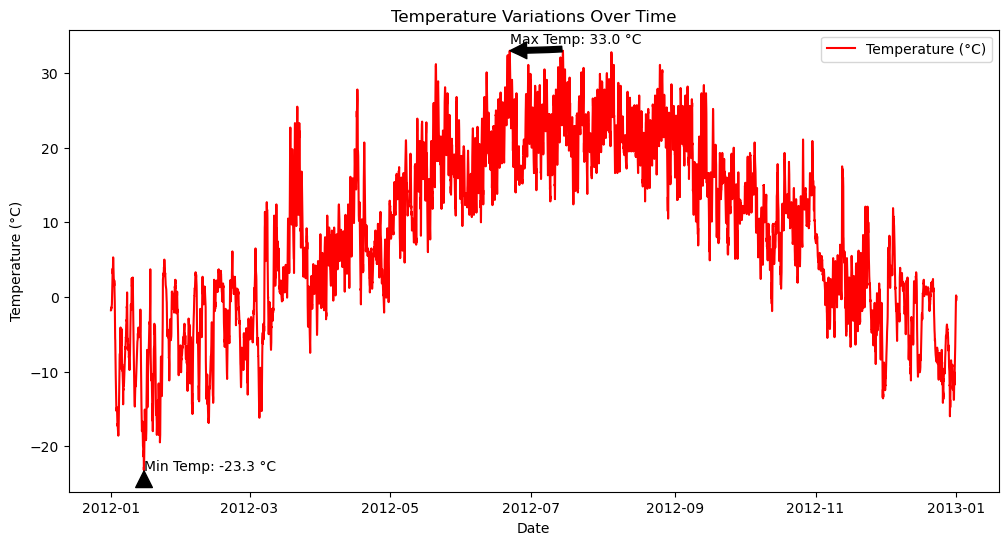

In [90]:
# Assuming 'Date/Time' is a column, not the index
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Temp_C'], label='Temperature (°C)', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variations Over Time')

# Adding legend
plt.legend()

# Annotating max temperature
max_temp = data['Temp_C'].max()
max_date = data.loc[data['Temp_C'].idxmax(), 'Date/Time']
plt.annotate(f'Max Temp: {max_temp} °C', xy=(max_date, max_temp), xytext=(max_date, max_temp + 1),
             arrowprops=dict(facecolor='black', shrink=0.05, connectionstyle="arc3,rad=-25.0"))

# Annotating min temperature
min_temp = data['Temp_C'].min()
min_date = data.loc[data['Temp_C'].idxmin(), 'Date/Time']
plt.annotate(f'Min Temp: {min_temp} °C', xy=(min_date, min_temp), xytext=(min_date, min_temp + 0),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Display the plot
plt.show()


# 2-Showing Weather distribution with bar graph
## distribution of different weather conditions with most common weather condition

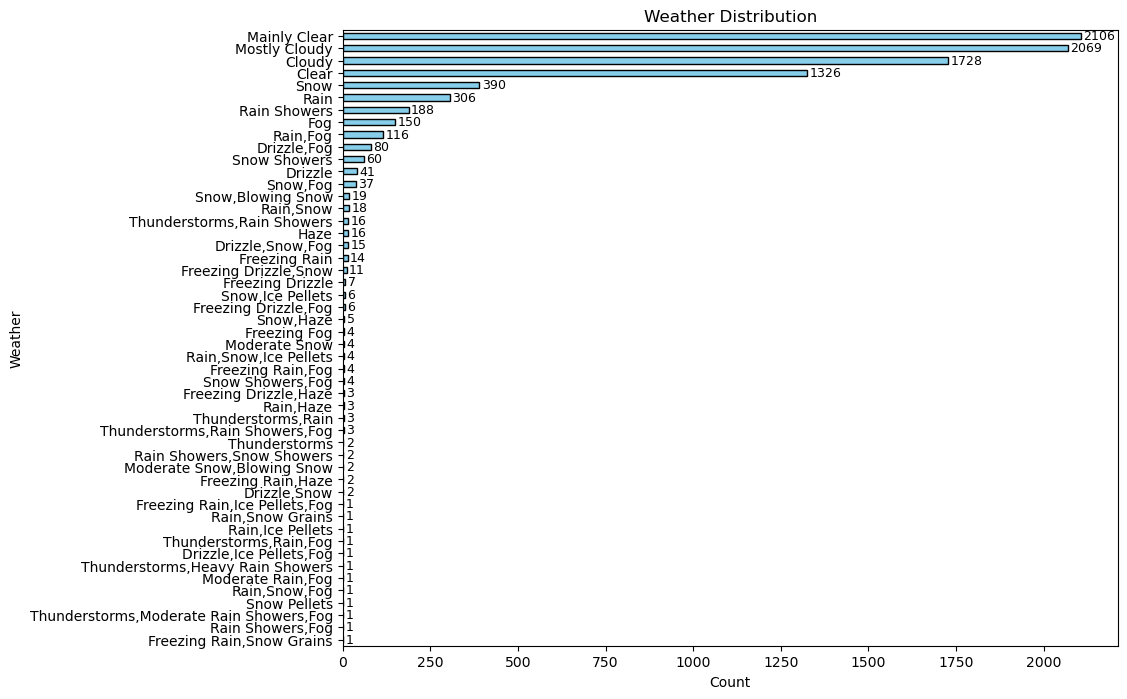

In [84]:
# Assuming 'Weather' is the column containing weather data
weather_counts = data['Weather'].value_counts().sort_values(ascending=True)

# Widen the size of the plot
plt.figure(figsize=(10, 8))

# Plotting the horizontal bar chart
bars = weather_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Weather')
plt.title('Weather Distribution')

# Adding labels to the bars
for index, value in enumerate(weather_counts):
    plt.text(value + 7, index, f'{value}', ha='left', va='center', fontsize=9)

# Display the plot
plt.show()

# 3- Relative Humidity Analysis
## trend of relative humidity with periods of high or low humidity.

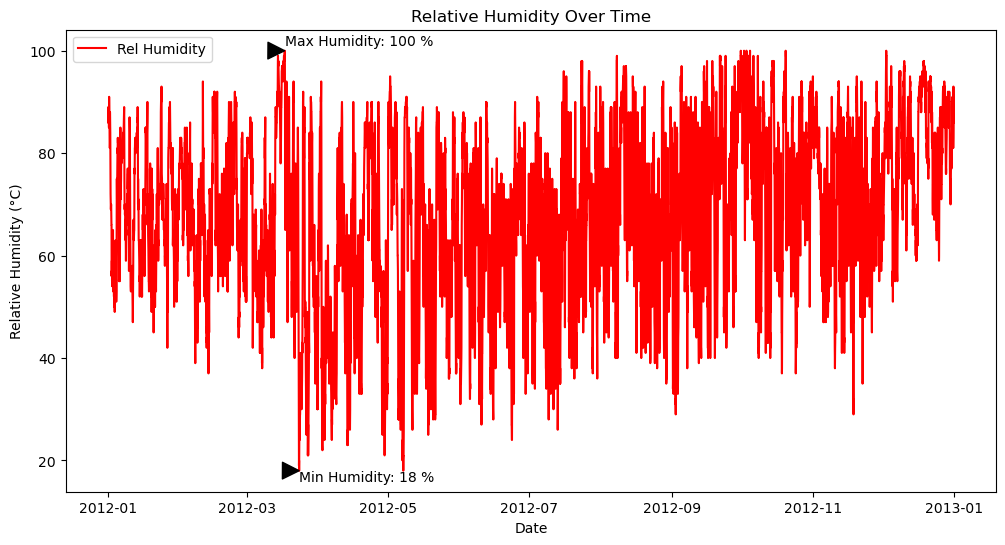

In [99]:
# Assuming 'Date/Time' is a column, not the index
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Rel Hum_%'], label='Rel Humidity', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Relative Humidity (°C)')
plt.title('Relative Humidity Over Time')

# Adding legend
plt.legend()

# Annotating max temperature
max_temp = data['Rel Hum_%'].max()
max_date = data.loc[data['Rel Hum_%'].idxmax(), 'Date/Time']
plt.annotate(f'Max Humidity: {max_temp} %', xy=(max_date, max_temp), xytext=(max_date, max_temp + 1),
             arrowprops=dict(facecolor='black', shrink=0.05, connectionstyle="arc3,rad=70.0"))

# Annotating min temperature
min_temp = data['Rel Hum_%'].min()
min_date = data.loc[data['Rel Hum_%'].idxmin(), 'Date/Time']
plt.annotate(f'Min Humidity: {min_temp} %', xy=(min_date, min_temp), xytext=(min_date, min_temp - 2),
             arrowprops=dict(facecolor='black', shrink=0.05,connectionstyle="arc3,rad=75.0"))

# Display the plot
plt.show()

# 4-Wind Speed Analysis
## distribution of wind speeds with average and maximum wind speeds.

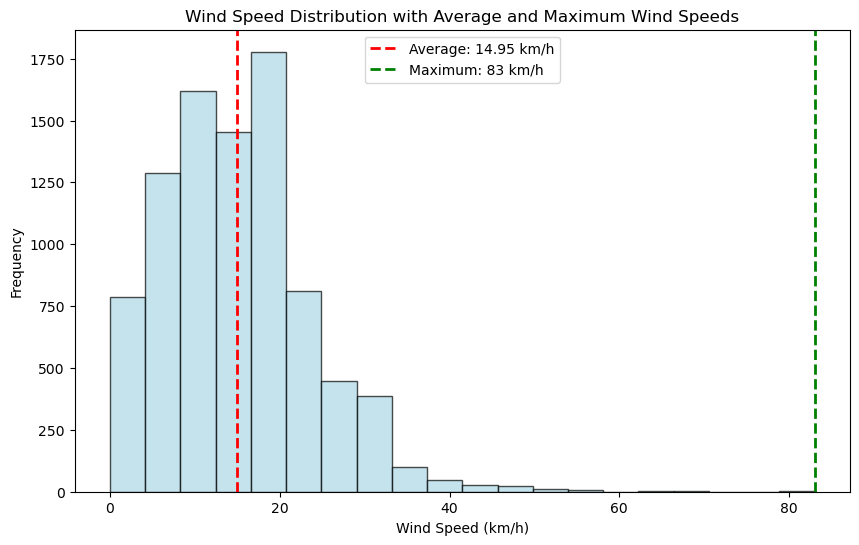

In [100]:
wind_speeds = data['Wind Speed_km/h']

# Calculate average and maximum wind speeds
average_speed = wind_speeds.mean()
max_speed = wind_speeds.max()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(wind_speeds, bins=20, color='lightblue', edgecolor='black', alpha=0.7)

# Mark average and maximum wind speeds with vertical lines
plt.axvline(average_speed, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_speed:.2f} km/h')
plt.axvline(max_speed, color='green', linestyle='dashed', linewidth=2, label=f'Maximum: {max_speed} km/h')

# Adding labels and title
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution with Average and Maximum Wind Speeds')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [104]:
data['Wind Speed_km/h'].mean()

14.94546903460838

# 5-Visibility Trends
## changes in visibility over time and periods with reduced visibility

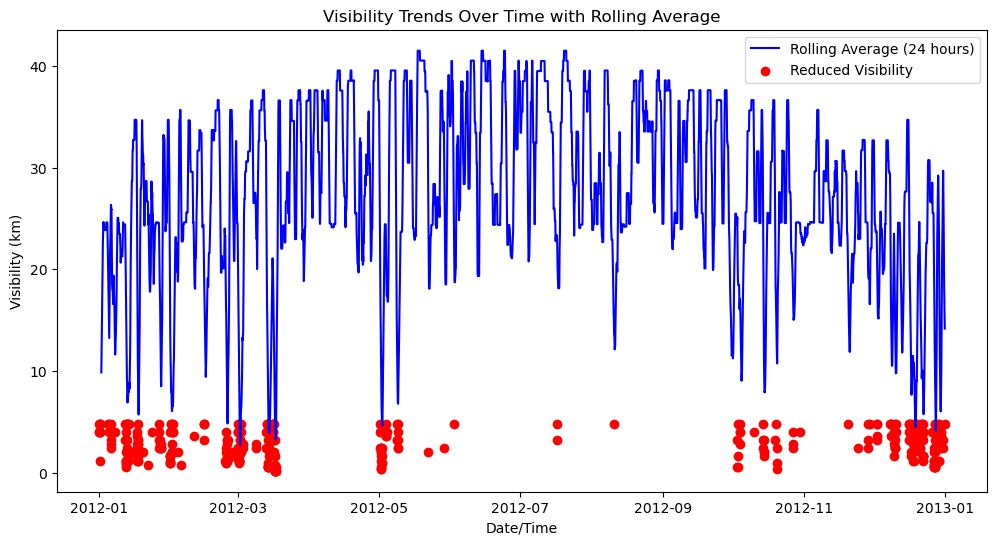

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Date/Time' is a column and 'Visibility_km' is the column containing visibility data
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Calculate a rolling average for smoother trends
rolling_average_window = 24  # You can adjust the window size based on your preference
rolling_average = data['Visibility_km'].rolling(window=rolling_average_window).mean()

# Plotting the rolling average line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], rolling_average, label=f'Rolling Average ({rolling_average_window} hours)', color='blue')

# Identify periods with reduced visibility
reduced_visibility_threshold = 5  # You can adjust this threshold based on your definition of reduced visibility
reduced_visibility_periods = data[data['Visibility_km'] < reduced_visibility_threshold]

# Highlight reduced visibility periods with a different color
plt.scatter(reduced_visibility_periods['Date/Time'], reduced_visibility_periods['Visibility_km'], color='red', label='Reduced Visibility')

# Adding labels and title
plt.xlabel('Date/Time')
plt.ylabel('Visibility (km)')
plt.title('Visibility Trends Over Time with Rolling Average')

# Adding legend
plt.legend()

# Display the plot
plt.show()


## 5.1- Showing weather with minimum visibility over time.

In [122]:
data.groupby('Weather')[['Visibility_km','Date/Time']].min().sort_values(by='Visibility_km')

,Visibility_km,Date/Time
Weather,,
Freezing Fog,0.2,2012-01-22 06:00:00
Fog,0.2,2012-01-01 00:00:00
Moderate Snow,0.6,2012-01-12 15:00:00
"Snow,Blowing Snow",0.6,2012-01-13 21:00:00
"Moderate Snow,Blowing Snow",0.6,2012-12-27 10:00:00
"Drizzle,Fog",1.0,2012-01-23 20:00:00
Snow,1.0,2012-01-03 07:00:00
"Snow,Fog",1.2,2012-02-10 23:00:00
"Freezing Rain,Haze",2.0,2012-02-01 14:00:00


# 6- Variations in atmospheric pressure

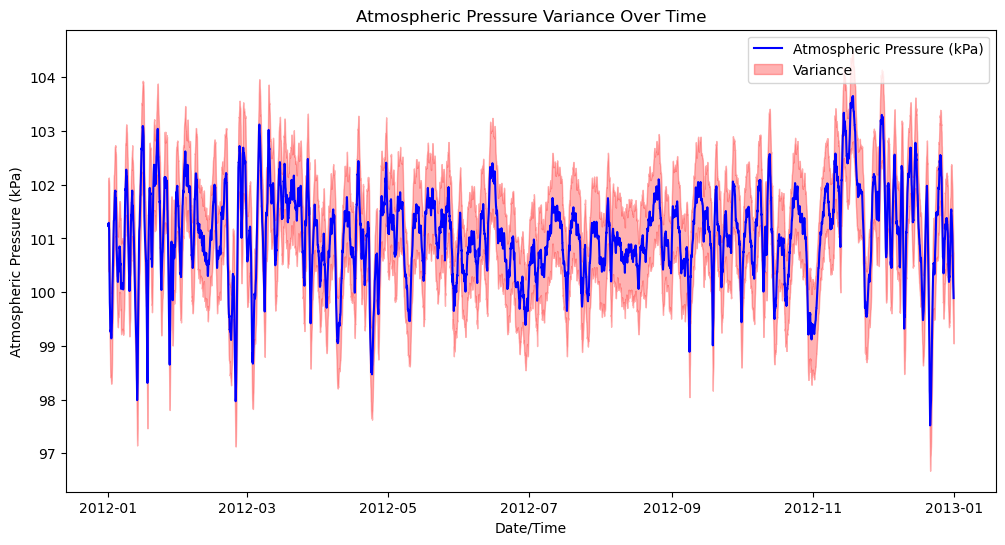

In [125]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Press_kPa'], label='Atmospheric Pressure (kPa)', color='blue')

# Calculate upper and lower bounds for the shaded region (e.g., one standard deviation)
variance = data['Press_kPa'].std()
upper_bound = data['Press_kPa'] + variance
lower_bound = data['Press_kPa'] - variance

# Fill the area between upper and lower bounds to represent variance
plt.fill_between(data['Date/Time'], lower_bound, upper_bound, color='red', alpha=0.3, label='Variance')

# Adding labels and title
plt.xlabel('Date/Time')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.title('Atmospheric Pressure Variance Over Time')

# Adding legend
plt.legend()

# Display the plot
plt.show()


# 7- Dew point temperature trend

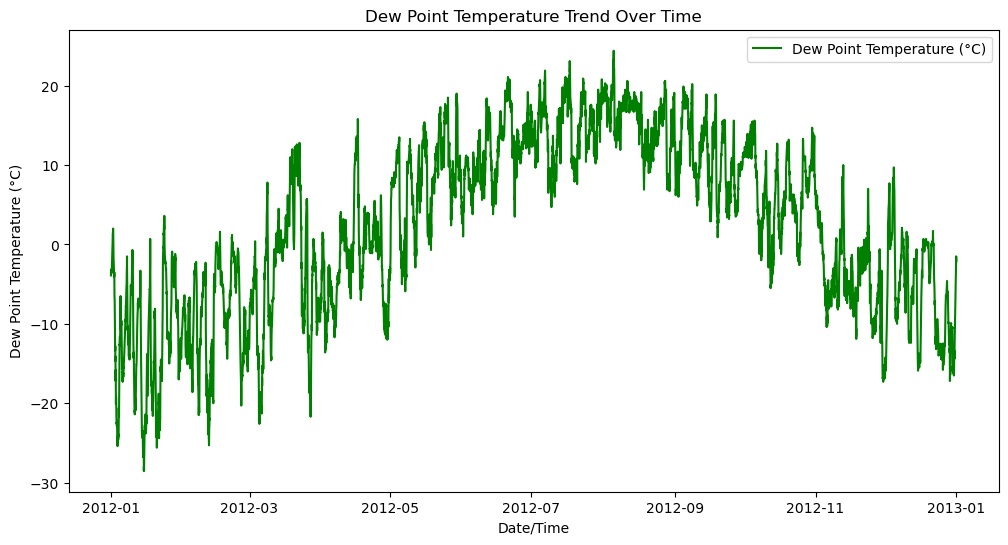

In [131]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Plotting the line chart for dew point temperature trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Dew Point Temp_C'], label='Dew Point Temperature (°C)', color='green')

# Adding labels and title
plt.xlabel('Date/Time')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Dew Point Temperature Trend Over Time')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# 8- Correlation between different weather variables

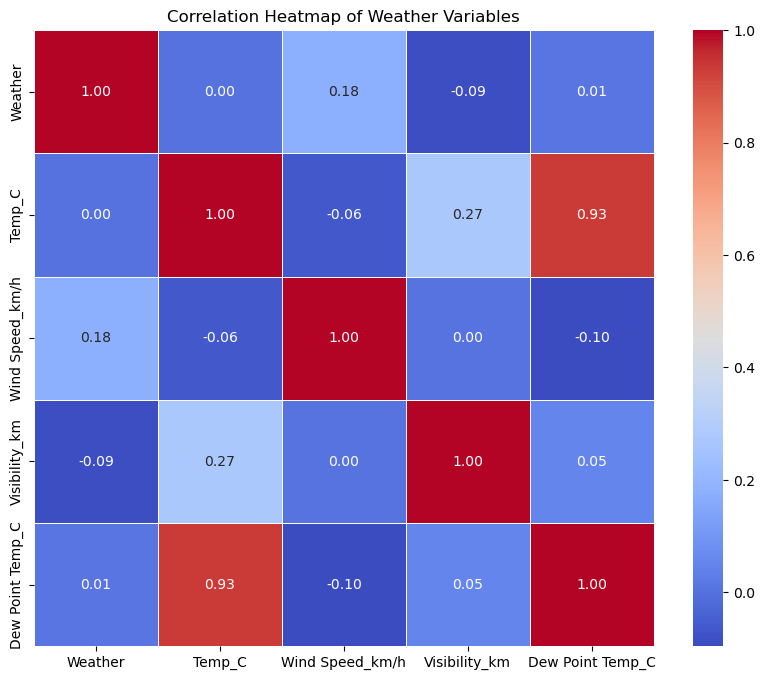

In [139]:
selected_columns = ['Weather', 'Temp_C', 'Wind Speed_km/h', 'Visibility_km', 'Dew Point Temp_C']

# Create a subset DataFrame with selected columns
subset_data = data[selected_columns].copy()

# Convert categorical 'Weather' column to numerical values using label encoding
subset_data['Weather'] = subset_data['Weather'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Weather Variables')

# Display the heatmap
plt.show()


# 9- Extreme Weather Events

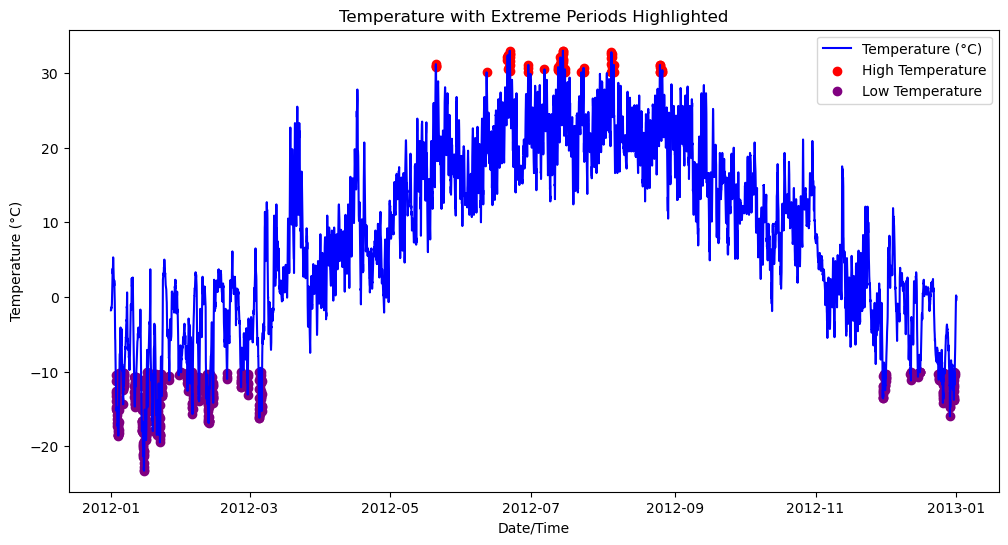

In [165]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Define thresholds for extreme temperatures (adjust as needed)
high_temp_threshold = 30
low_temp_threshold = -10

# Identify periods with extreme temperatures
extreme_temp_periods_high = data[data['Temp_C'] > high_temp_threshold]
extreme_temp_periods_low = data[data['Temp_C'] < low_temp_threshold]

# Plotting the temperature data with extreme periods highlighted
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Temp_C'], label='Temperature (°C)', color='blue')
plt.scatter(extreme_temp_periods_high['Date/Time'], extreme_temp_periods_high['Temp_C'], color='red', label='High Temperature')
plt.scatter(extreme_temp_periods_low['Date/Time'], extreme_temp_periods_low['Temp_C'], color='purple', label='Low Temperature')

# Adding labels and title
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature with Extreme Periods Highlighted')

# Adding legend
plt.legend()

# Display the plot
plt.show()
